<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Lab 02 - Introduction To Data Science @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 4.0 - Data modelling
</div>

This section for bouns, you might need to use some basic Machine Learning algorithms to answer some questions that in cases of regression, and classification. In this scope of this subject, highly recommend you use `scikit-learn` (instead of implement once again these algorithms)

## Import

In [1]:
# YOUR CODE HERE (OPTION) 
# If you need other libraries, you can import them here
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

## Data preparation

In [2]:
# YOUR CODE HERE (OPTION) 
read_data = pd.read_csv('../data/processed/21127528_asia_processed.csv')
read_data

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Year,Country
0,41128771.0,20362329.0,20766442.0,20.700378,6.343087,9.000000,21.36864,28.950359,31.756573,12.925650,...,3671.529455,20.82783,78.362752,68.719252,74.080759,101.511461,33.217823,93.345172,2022,Afghanistan
1,40099462.0,19844584.0,20254878.0,35.842000,7.344000,9.000000,21.36864,28.950359,31.756573,12.925650,...,3671.529455,17.86000,78.362752,58.915000,65.279000,101.511461,33.217823,93.345172,2021,Afghanistan
2,38972230.0,19279929.0,19692301.0,36.051000,7.113000,9.000000,18.48131,45.983410,53.913680,26.418340,...,3671.529455,17.58000,78.362752,59.866000,65.432000,101.511461,10.858440,93.345172,2020,Afghanistan
3,37769499.0,18679090.0,19090409.0,36.466000,6.791000,9.000000,18.33941,44.512630,59.361470,24.079330,...,3671.529455,18.51000,78.362752,60.619000,66.677000,110.007507,33.217823,86.175522,2019,Afghanistan
4,36686784.0,18136922.0,18549862.0,36.927000,6.981000,9.000000,18.12015,44.397120,63.669470,23.553130,...,3671.529455,17.96000,78.362752,59.923000,66.458000,107.780533,9.963790,88.735519,2018,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,18114552.0,8986446.0,9128106.0,41.105000,8.306000,9.000000,11.13616,54.113030,76.901620,2.443211,...,123.602284,1.00000,98.269558,60.024000,63.921000,66.228958,9.482180,49.973251,1999,"Yemen, Rep."
1312,17608133.0,8739457.0,8868676.0,41.478000,8.666000,9.000000,10.83733,56.879650,78.408560,3.433815,...,125.055848,1.07000,98.046808,59.460000,63.283000,101.511461,33.217823,93.345172,1998,"Yemen, Rep."
1313,17108681.0,8495862.0,8612819.0,42.498000,8.932000,8.913545,10.82090,56.413790,79.287020,3.180978,...,127.946742,1.15000,97.913124,59.230000,62.999000,101.511461,4.160940,93.345172,1997,"Yemen, Rep."
1314,16614326.0,8254738.0,8359588.0,43.273000,9.343000,8.913545,10.86341,55.910250,80.117720,2.951060,...,114.900839,1.22000,97.782534,58.693000,62.433000,101.511461,33.217823,93.345172,1996,"Yemen, Rep."


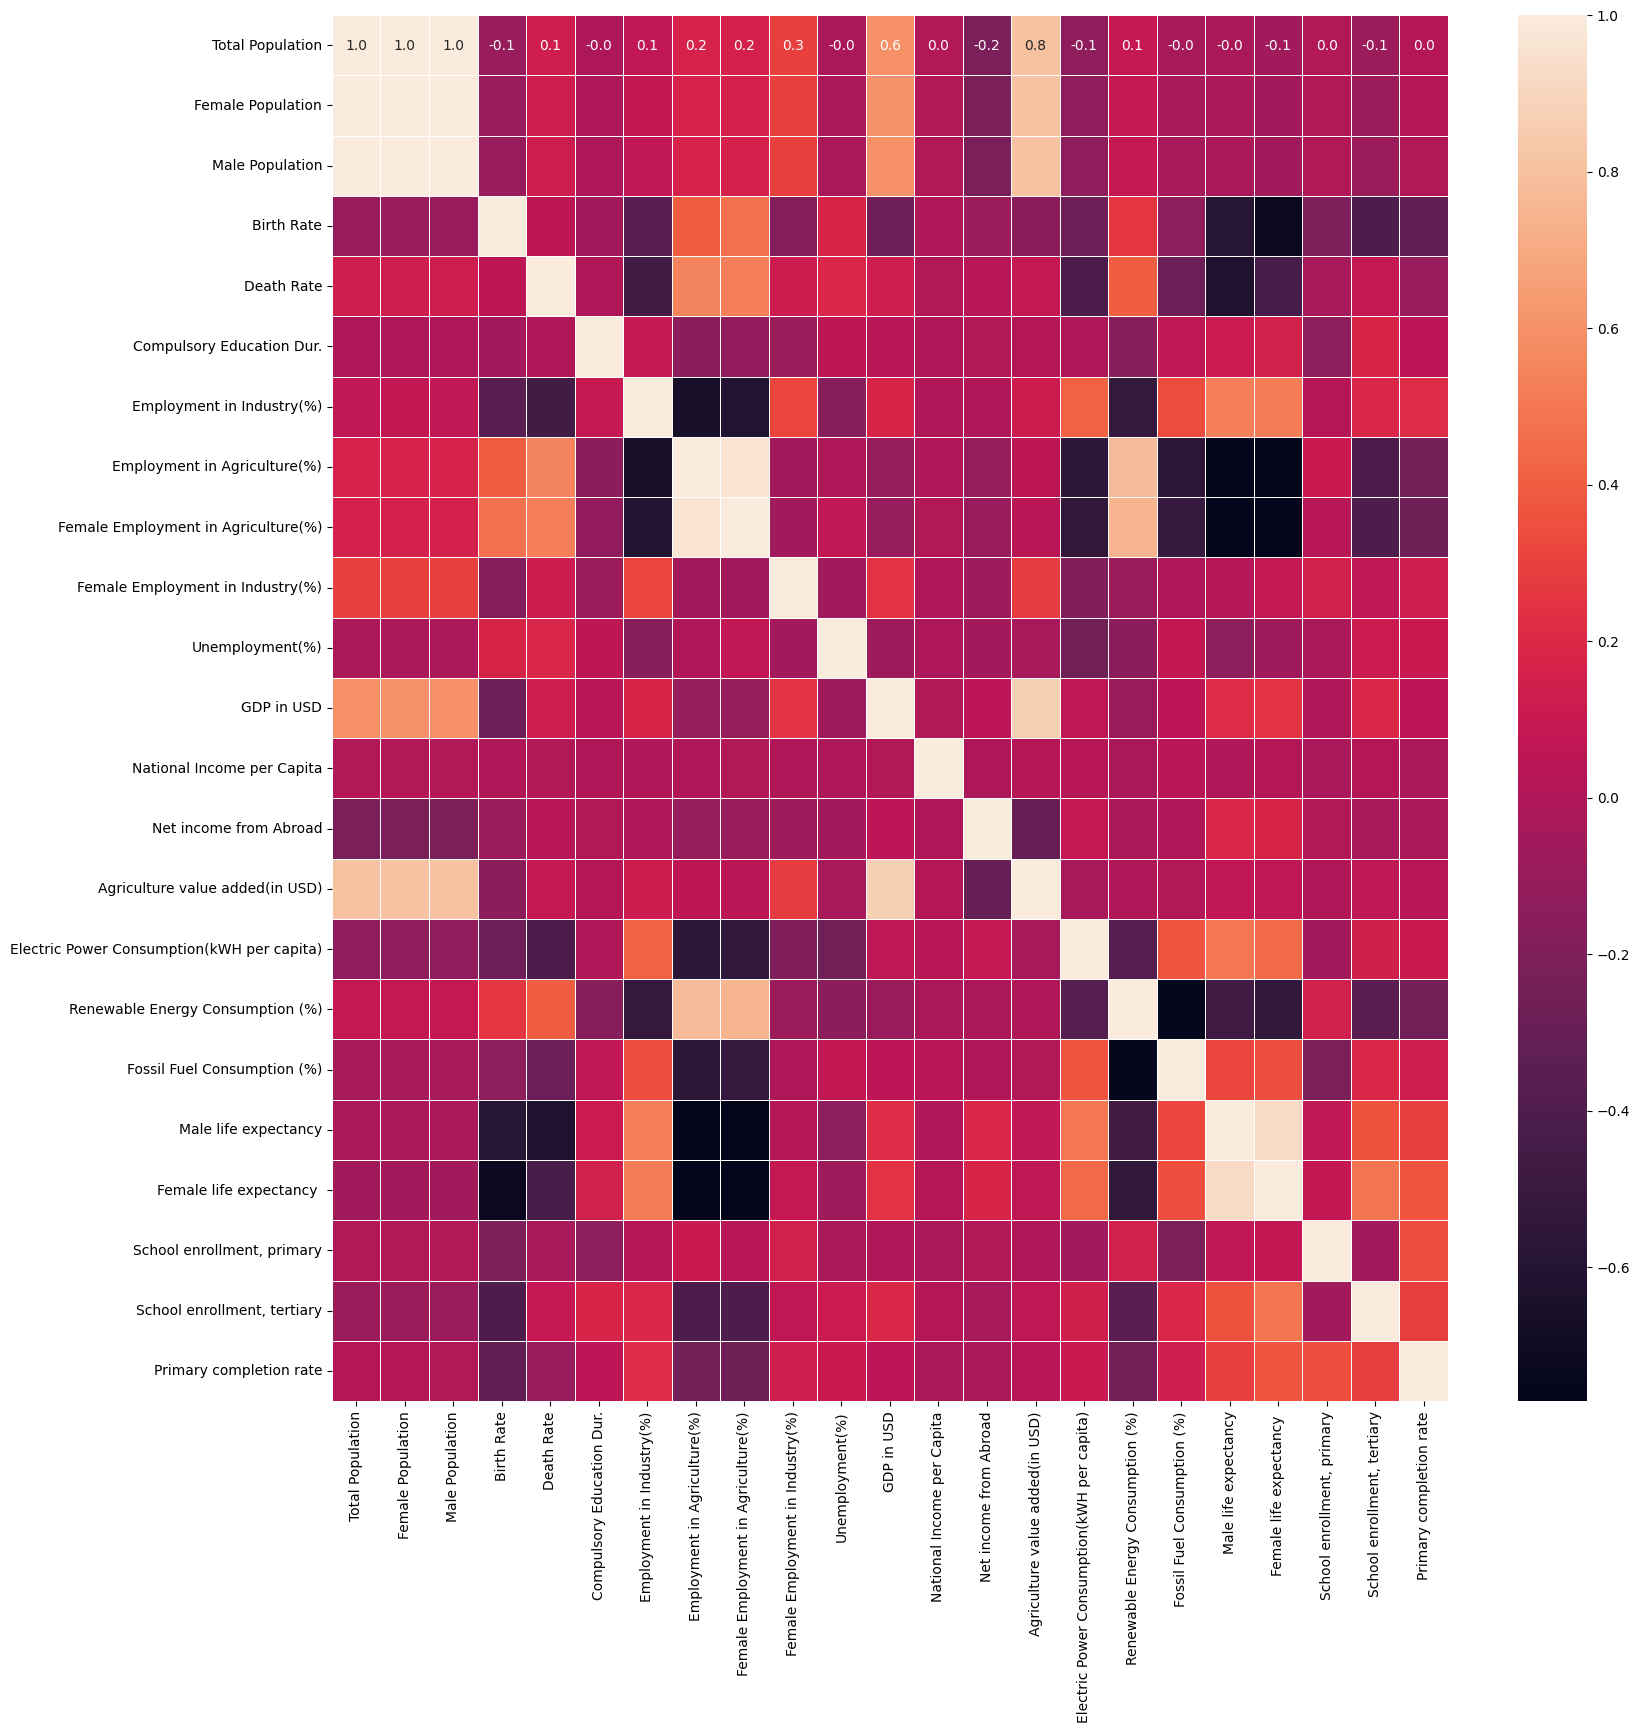

In [3]:
#correlation map

f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(read_data.drop(['Year', 'Country'], axis=1).corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.show()


In [4]:
correlation_GDP = read_data.drop(['Year', 'Country'], axis=1).corr()["GDP in USD"]
print(correlation_GDP.sort_values(ascending=False))

GDP in USD                                    1.000000
Agriculture value added(in USD)               0.864640
Female Population                             0.601405
Total Population                              0.597498
Male Population                               0.593721
Female Employment in Industry(%)              0.249782
Female life expectancy                        0.245178
Male life expectancy                          0.217971
School enrollment, tertiary                   0.193433
Employment in Industry(%)                     0.174113
Death Rate                                    0.130369
Electric Power Consumption(kWH per capita)    0.063160
Fossil Fuel Consumption (%)                   0.052053
Net income from Abroad                        0.049779
Primary completion rate                       0.047155
Compulsory Education Dur.                     0.027454
National Income per Capita                    0.010538
School enrollment, primary                   -0.004425
Unemployme

### From the displayed map heat and above data, I decide to choose top 3 negative correlation of GPD with **Female Employment in Agriculture(%)**, **Birth rate** and **Employment in Agriculture(%)**; top 5 positive correlation with GDP, including **Agriculture value added(in USD)**, **Female Population**, **Total Population**, **Male Population** and **Female Employment in Industry(%)** . 

In [5]:
chosen_data = read_data[['Female Employment in Agriculture(%)','Birth Rate','Employment in Agriculture(%)','Agriculture value added(in USD)','Female Population','Total Population','Male Population','Female Employment in Industry(%)','GDP in USD']]

chosen_data

,Female Employment in Agriculture(%),Birth Rate,Employment in Agriculture(%),Agriculture value added(in USD),Female Population,Total Population,Male Population,Female Employment in Industry(%),GDP in USD
0,31.756573,20.700378,28.950359,3.171374e+10,20362329.0,41128771.0,20766442.0,12.925650,4.457851e+11
1,31.756573,35.842000,28.950359,4.883090e+09,19844584.0,40099462.0,20254878.0,12.925650,1.458314e+10
2,53.913680,36.051000,45.983410,5.402595e+09,19279929.0,38972230.0,19692301.0,26.418340,2.014345e+10
3,59.361470,36.466000,44.512630,4.872441e+09,18679090.0,37769499.0,19090409.0,24.079330,1.890450e+10
4,63.669470,36.927000,44.397120,4.060050e+09,18136922.0,36686784.0,18549862.0,23.553130,1.841886e+10
...,...,...,...,...,...,...,...,...,...
1311,76.901620,41.105000,54.113030,1.255802e+09,8986446.0,18114552.0,9128106.0,2.443211,7.641103e+09
1312,78.408560,41.478000,56.879650,1.237414e+09,8739457.0,17608133.0,8868676.0,3.433815,6.325142e+09
1313,79.287020,42.498000,56.413790,1.107258e+09,8495862.0,17108681.0,8612819.0,3.180978,6.838557e+09
1314,80.117720,43.273000,55.910250,9.678368e+08,8254738.0,16614326.0,8359588.0,2.951060,5.785685e+09


In [6]:
train_data = chosen_data
train_data

,Female Employment in Agriculture(%),Birth Rate,Employment in Agriculture(%),Agriculture value added(in USD),Female Population,Total Population,Male Population,Female Employment in Industry(%),GDP in USD
0,31.756573,20.700378,28.950359,3.171374e+10,20362329.0,41128771.0,20766442.0,12.925650,4.457851e+11
1,31.756573,35.842000,28.950359,4.883090e+09,19844584.0,40099462.0,20254878.0,12.925650,1.458314e+10
2,53.913680,36.051000,45.983410,5.402595e+09,19279929.0,38972230.0,19692301.0,26.418340,2.014345e+10
3,59.361470,36.466000,44.512630,4.872441e+09,18679090.0,37769499.0,19090409.0,24.079330,1.890450e+10
4,63.669470,36.927000,44.397120,4.060050e+09,18136922.0,36686784.0,18549862.0,23.553130,1.841886e+10
...,...,...,...,...,...,...,...,...,...
1311,76.901620,41.105000,54.113030,1.255802e+09,8986446.0,18114552.0,9128106.0,2.443211,7.641103e+09
1312,78.408560,41.478000,56.879650,1.237414e+09,8739457.0,17608133.0,8868676.0,3.433815,6.325142e+09
1313,79.287020,42.498000,56.413790,1.107258e+09,8495862.0,17108681.0,8612819.0,3.180978,6.838557e+09
1314,80.117720,43.273000,55.910250,9.678368e+08,8254738.0,16614326.0,8359588.0,2.951060,5.785685e+09


In [7]:
test_data = chosen_data.sample(n=800, random_state=42)
test_data.reset_index(drop=True, inplace=True)
test_data

,Female Employment in Agriculture(%),Birth Rate,Employment in Agriculture(%),Agriculture value added(in USD),Female Population,Total Population,Male Population,Female Employment in Industry(%),GDP in USD
0,39.601810,19.849,39.420490,5.872192e+09,8281333.0,16396860.0,8115527.0,23.428610,2.587280e+10
1,59.258110,20.004,52.683160,3.171374e+10,11630769.0,22614347.0,10983578.0,12.563200,4.457851e+11
2,22.626200,19.428,17.145750,4.119522e+10,40336100.0,81790841.0,41454741.0,23.749580,4.082129e+11
3,50.416020,15.102,47.325970,1.481168e+09,1964188.0,3717668.0,1753480.0,4.790407,1.719007e+10
4,0.369239,16.881,1.371264,8.099773e+07,177979.0,372808.0,194829.0,9.781039,1.147046e+10
...,...,...,...,...,...,...,...,...,...
795,20.230500,28.078,20.057350,8.808100e+09,20774817.0,41563520.0,20788703.0,11.389410,2.336361e+11
796,15.227690,22.664,25.439750,3.344904e+10,52616947.0,106738501.0,54121554.0,9.862619,3.284807e+11
797,0.425249,16.942,1.369856,1.475091e+08,200411.0,416656.0,216245.0,9.246939,1.709780e+10
798,86.396760,46.330,63.051860,1.551685e+09,11690825.0,23553551.0,11862726.0,9.143875,5.220825e+09


### I also create a test set for training data with 800 rows data from the original sample.

## Feature engineering

In [8]:
# YOUR CODE HERE (OPTION) 
X_train = np.array(train_data.drop(['GDP in USD'], axis=1))
y_train = np.array(train_data['GDP in USD']).reshape(-1,1)

X_test = np.array(test_data.drop(['GDP in USD'], axis=1))
y_test = np.array(test_data['GDP in USD']).reshape(-1,1)

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1316, 8), (1316, 1), (800, 8), (800, 1))

## Training model

In [10]:
# YOUR CODE HERE (OPTION) 
train_model = LinearRegression()
train_model.fit(X_train, y_train)

train_coef = train_model.coef_
train_intercept = train_model.intercept_
print(train_coef)
print(train_intercept)

[[ 8.88607230e+09 -1.36653013e+10 -1.67945608e+10  1.34379840e+01
   9.39992939e+04  8.86589997e+02 -9.28000894e+04 -9.48852522e+09]]
[6.38026482e+11]


In [11]:
#print out the equation
#Coefficients of each feature

k = 0
max_column_length = max(len(col) for col in train_data.columns)

for i in range(len(train_data.columns)):
    if train_data.columns[i] == 'GDP in USD':
        continue
    print(train_data.columns[i].ljust(max_column_length) + ' : ' + str(train_coef[0][k]))
    k +=1


Female Employment in Agriculture(%) : 8886072303.890564
Birth Rate                          : -13665301270.04958
Employment in Agriculture(%)        : -16794560817.481268
Agriculture value added(in USD)     : 13.437983957959396
Female Population                   : 93999.29393312216
Total Population                    : 886.589996864902
Male Population                     : -92800.08942290474
Female Employment in Industry(%)    : -9488525217.26711


In [12]:
equation = 'GDP in USD = ' + str(train_intercept[0])
k = 0
for i in range(len(train_data.columns)):
    if train_data.columns[i] == 'GDP in USD':
        continue
    equation += ' + ' + str(np.round(train_coef[0][k],3)) + '*' + train_data.columns[i]
    k +=1

print(equation)

GDP in USD = 638026481791.1227 + 8886072303.891*Female Employment in Agriculture(%) + -13665301270.05*Birth Rate + -16794560817.481*Employment in Agriculture(%) + 13.438*Agriculture value added(in USD) + 93999.294*Female Population + 886.59*Total Population + -92800.089*Male Population + -9488525217.267*Female Employment in Industry(%)


$\text{GDP in USD} = 638026481791.1227 + 8886072303.891 \times \text{Female Employment in Agriculture(\%)} - 13665301270.05 \times \text{Birth Rate} - 16794560817.481 \times \text{Employment in Agriculture(\%)} + 13.438 \times \text{Agriculture value added(in USD)} + 93999.294 \times \text{Female Population} + 886.59 \times \text{Total Population} - 92800.089 \times \text{Male Population} - 9488525217.267 \times \text{Female Employment in Industry(\%)}$

### This is the model for data with Linear Regression - 8 features, to assess the influence on GDP in USD in Asia.

## Prediction

In [13]:
# YOUR CODE HERE (OPTION) 
y_pred = train_model.predict(X_test)

## Evaluation

### In this part, I will use evaluation metrics named **MAE - Mean Absolute Error** to assess the build model

In [14]:
# YOUR CODE HERE (OPTION) 
mae_val = mean_absolute_error(y_test, y_pred)

print('MAE: ', mae_val)

MAE:  307554687841.2386


## Results analysis

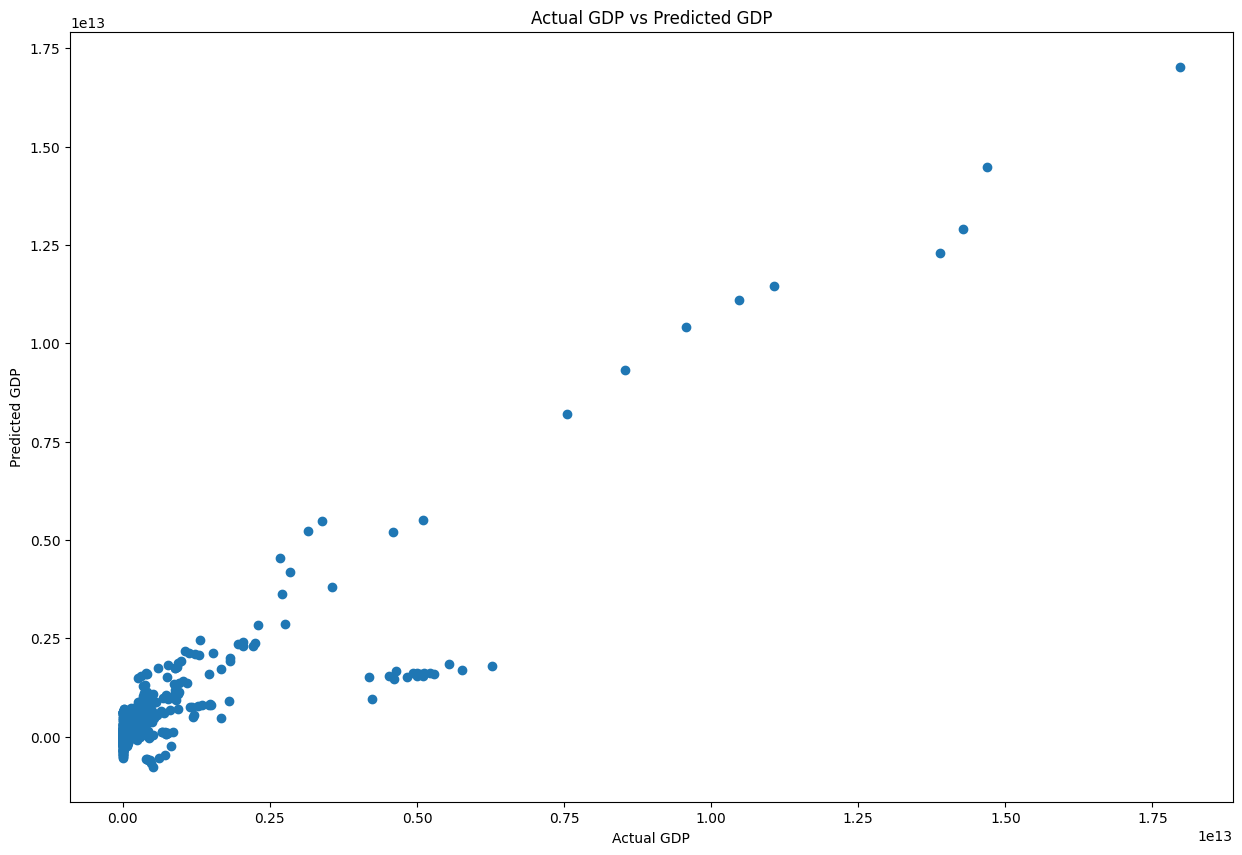

In [15]:
# YOUR CODE HERE (OPTION) 
# Plot the data
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.title('Actual GDP vs Predicted GDP')
plt.show()

* From the MAE calculated, the value is still quite high. On average, the absolute difference between the actual and predicted values in my model is approximately 307 million.
* The graph indicates a significant gap between the actual and predicted GDP for countries with a lower GDP. However, for countries with a higher GDP, this gap narrowed considerably, with the actual and predicted GDP values becoming almost identical.
* This problem could be contributed by variety of factors. The model might be heavily affected by certain indicators that are more skewed toward high - GDP countries. Hence, there could exist crucial factors in low GDP countries that is taken for granted.
* To self assessment, this model is not suitable and the best described for all cases, but it somehow reflects important sides dedicating to the GDP fluctuations. 


## Conclusion

**Your conclusion**

* From the model, it is shown that there are 4 positive correlations with GDPs and also 4 negative ones. 
* In the positive groups, it includes **Female Employment in Agriculture(%)**, **Agriculture value added(in USD)**, **Female Population** and **Total Population**. A positive coefficient suggests that as the percentage of the features increases, the GDP is expected to increase; in short a positive impact.
    * From this point, I suppose that the female have a crucial role in helping an economic growth. Apparently, in these modern days and ages, all people should have a high spirit in joining the labour market, both men and women, contributing to the upgrade of finance and life standard.
    * Moreover, concerning **Agriculture value added(in USD)**, the positive coefficient indicates that an increase in the value added by agriculture sector is associated with an increase in GDP. This makes sense as it directly contributes to the economic output.
* About negative group, they concludes **Birth rate**, **Employment in Agriculture(%)**, **Male Population** and **Female Employment in Industry(%)**.  This suggests that increases in these variables are associated with decreases in GDP.
    * This could be due to higher dependency ratios with increased birth rates, lower productivity in agriculture, various socio-economic factors related to the male population, and certain factors related to female employment in industry.
    * However, overall, there still require further exploration and research into the case for better understanding to make more precise decision.